In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [318]:
otv = pd.read_csv("otv.csv")

In [319]:
otv.head()

,Tarih,ÖTV,Adet,ÖTV Oranı,ÖTV uygulanan Ürün Adı
0,2018-05-22,2124.10,1000,2.12410,Kursunsuz Benzin 95
1,2018-05-22,2124.10,1000,2.12410,Kursunsuz Benzin 95
2,2018-05-22,2081.62,1000,2.08162,Etanollü Kurşunsuz Benzin 95
3,2018-05-22,2081.62,1000,2.08162,Etanollü Kurşunsuz Benzin 95
4,2018-05-22,1567.90,1000,1.56790,Motorin


In [320]:
otv.columns

Index(['Tarih', 'ÖTV ', 'Adet', 'ÖTV Oranı', 'ÖTV uygulanan Ürün Adı'], dtype='object')

In [321]:
otv = otv.rename(columns={
    "Tarih":"Date",
    "ÖTV Oranı":"ÖTV_Oranı",
    "ÖTV uygulanan Ürün Adı":"ÖTV_Uygulanan_Ürün_Adı"
})

In [322]:
otv["Date"] = pd.to_datetime(otv["Date"])

In [323]:
otv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 417 entries, 0 to 416
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    417 non-null    datetime64[ns]
 1   ÖTV                     417 non-null    float64       
 2   Adet                    417 non-null    int64         
 3   ÖTV_Oranı               417 non-null    float64       
 4   ÖTV_Uygulanan_Ürün_Adı  417 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 16.4+ KB


In [324]:
unique_dates = otv["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2018-05-22', '2018-05-23', '2018-05-24', '2018-05-25',
               '2018-05-26', '2018-05-27', '2018-05-28', '2018-05-29',
               '2018-05-30', '2018-05-31',
               ...
               '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
               '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27',
               '2022-02-28', '2022-03-01'],
              dtype='datetime64[ns]', length=1380, freq='D')

In [325]:
missing_dates = all_dates[~all_dates.isin(otv["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
otv = pd.concat([otv, missing_dates_df], ignore_index=True)
otv.sort_values(by="Date", inplace=True)
otv.fillna(np.nan, inplace=True)
otv.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1667 entries, 0 to 415
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    1667 non-null   datetime64[ns]
 1   ÖTV                     417 non-null    float64       
 2   Adet                    417 non-null    float64       
 3   ÖTV_Oranı               417 non-null    float64       
 4   ÖTV_Uygulanan_Ürün_Adı  417 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 78.1+ KB


In [326]:
platts = pd.read_csv("platts.csv")

In [327]:
platts.head()

,Tarih,Ürün,Avrupa Birliği Birimi,AB Piyasa Fiyatı,AB Piyasa Fiyatı- Yüksek,AB Piyasa Fiyatı- Düşük,Dolar Kuru (Satış)
0,2022-12-31,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,932.25,932.50,932.00,18.7320
1,2022-12-30,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,932.25,932.50,932.00,18.7320
2,2022-12-29,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,927.00,927.25,926.75,18.7303
3,2022-12-28,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,926.25,926.50,926.00,18.7301
4,2022-12-27,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,920.00,920.25,919.75,18.7150


In [328]:
platts.columns

Index(['Tarih', 'Ürün', 'Avrupa Birliği Birimi', 'AB Piyasa Fiyatı',
       'AB Piyasa Fiyatı- Yüksek', 'AB Piyasa Fiyatı- Düşük',
       'Dolar Kuru (Satış)'],
      dtype='object')

In [329]:
platts = platts.rename(columns={
    "Tarih":"Date",
    "Avrupa Birliği Birimi":"Avrupa_Birliği_Birimi(Platts)",
    "AB Piyasa Fiyatı":"AB_Piyasa_Fiyatı(Platts)",
    "AB Piyasa Fiyatı- Yüksek":"AB_Piyasa_Fiyatı_Yüksek(Platts)",
    "AB Piyasa Fiyatı- Düşük":"AB_Piyasa_Fiyatı_Düşük(Platts)",
    "Dolar Kuru (Satış)":"Dolar_Kuru(Satış)(Platts)"
})

In [330]:
platts["Date"] = pd.to_datetime(platts["Date"])

In [331]:
platts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3650 entries, 0 to 3649
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             3650 non-null   datetime64[ns]
 1   Ürün                             3650 non-null   object        
 2   Avrupa_Birliği_Birimi(Platts)    3650 non-null   object        
 3   AB_Piyasa_Fiyatı(Platts)         3650 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Platts)  3650 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Platts)   3650 non-null   float64       
 6   Dolar_Kuru(Satış)(Platts)        3650 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 199.7+ KB


In [332]:
unique_dates = platts["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1825, freq='D')

In [333]:
missing_dates = all_dates[~all_dates.isin(platts["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
platts = pd.concat([platts, missing_dates_df], ignore_index=True)
platts.sort_values(by="Date", inplace=True)
platts.fillna(np.nan, inplace=True)
platts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3650 entries, 1824 to 0
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             3650 non-null   datetime64[ns]
 1   Ürün                             3650 non-null   object        
 2   Avrupa_Birliği_Birimi(Platts)    3650 non-null   object        
 3   AB_Piyasa_Fiyatı(Platts)         3650 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Platts)  3650 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Platts)   3650 non-null   float64       
 6   Dolar_Kuru(Satış)(Platts)        3650 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 228.1+ KB


In [334]:
selected_rows = platts.loc[platts['Ürün'] == 'Prem Unl 10 ppm CIF Med (Genova/Lavera)']
new_dataset = selected_rows.copy()
platts = platts.drop(platts[platts['Ürün'] == 'Prem Unl 10 ppm CIF Med (Genova/Lavera)'].index)

In [335]:
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 3649 to 1825
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1825 non-null   datetime64[ns]
 1   Ürün                             1825 non-null   object        
 2   Avrupa_Birliği_Birimi(Platts)    1825 non-null   object        
 3   AB_Piyasa_Fiyatı(Platts)         1825 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Platts)  1825 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Platts)   1825 non-null   float64       
 6   Dolar_Kuru(Satış)(Platts)        1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 114.1+ KB


In [336]:
new_dataset.head()

,Date,Ürün,Avrupa_Birliği_Birimi(Platts),AB_Piyasa_Fiyatı(Platts),AB_Piyasa_Fiyatı_Yüksek(Platts),AB_Piyasa_Fiyatı_Düşük(Platts),Dolar_Kuru(Satış)(Platts)
3649,2018-01-02,Prem Unl 10 ppm CIF Med (Genova/Lavera),$/TON,632.75,633.00,632.50,3.7719
3648,2018-01-03,Prem Unl 10 ppm CIF Med (Genova/Lavera),$/TON,637.25,637.50,637.00,3.7685
3647,2018-01-04,Prem Unl 10 ppm CIF Med (Genova/Lavera),$/TON,633.25,633.50,633.00,3.7668
3646,2018-01-05,Prem Unl 10 ppm CIF Med (Genova/Lavera),$/TON,628.50,628.75,628.25,3.7523
3645,2018-01-06,Prem Unl 10 ppm CIF Med (Genova/Lavera),$/TON,628.50,628.75,628.25,3.7523


In [337]:
platts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1824 to 0
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1825 non-null   datetime64[ns]
 1   Ürün                             1825 non-null   object        
 2   Avrupa_Birliği_Birimi(Platts)    1825 non-null   object        
 3   AB_Piyasa_Fiyatı(Platts)         1825 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Platts)  1825 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Platts)   1825 non-null   float64       
 6   Dolar_Kuru(Satış)(Platts)        1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 114.1+ KB


In [338]:
platts.head()

,Date,Ürün,Avrupa_Birliği_Birimi(Platts),AB_Piyasa_Fiyatı(Platts),AB_Piyasa_Fiyatı_Yüksek(Platts),AB_Piyasa_Fiyatı_Düşük(Platts),Dolar_Kuru(Satış)(Platts)
1824,2018-01-02,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,599.0,599.25,598.75,3.7719
1823,2018-01-03,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,609.0,609.25,608.75,3.7685
1822,2018-01-04,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,610.0,610.25,609.75,3.7668
1821,2018-01-05,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,606.5,606.75,606.25,3.7523
1820,2018-01-06,10 ppm ULSD CIF Med (Genova/Lavera),$/TON,606.5,606.75,606.25,3.7523


In [339]:
platts = platts.rename(columns={
    "AB_Piyasa_Fiyatı(Platts)":"AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD",
    "AB_Piyasa_Fiyatı_Yüksek(Platts)":"AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD",
    "AB_Piyasa_Fiyatı_Düşük(Platts)":"AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD",
    "Dolar_Kuru(Satış)(Platts)":"Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD"
})
platts = platts.drop(columns=["Ürün"])
platts.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 1824 to 0
Data columns (total 6 columns):
 #   Column                                       Non-Null Count  Dtype         
---  ------                                       --------------  -----         
 0   Date                                         1825 non-null   datetime64[ns]
 1   Avrupa_Birliği_Birimi(Platts)                1825 non-null   object        
 2   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD         1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD  1825 non-null   float64       
 4   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD   1825 non-null   float64       
 5   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD        1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 99.8+ KB


In [340]:
new_dataset = new_dataset.rename(columns={
    "AB_Piyasa_Fiyatı(Platts)":"AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm",
    "AB_Piyasa_Fiyatı_Yüksek(Platts)":"AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm",
    "AB_Piyasa_Fiyatı_Düşük(Platts)":"AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm",
    "Dolar_Kuru(Satış)(Platts)":"Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"
})
new_dataset = new_dataset.drop(columns=["Ürün","Avrupa_Birliği_Birimi(Platts)"])
new_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1825 entries, 3649 to 1825
Data columns (total 5 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1825 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1825 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm        1825 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 85.5 KB


In [341]:
platts = pd.merge(platts, new_dataset, on="Date", how="outer")
platts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1825 non-null   datetime64[ns]
 1   Avrupa_Birliği_Birimi(Platts)                    1825 non-null   object        
 2   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1825 non-null   float64       
 4   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1825 non-null   float64       
 5   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1825 non-null   float64       
 6   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 7   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 8   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Un

In [342]:
platts.head()

,Date,Avrupa_Birliği_Birimi(Platts),AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD,AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD,AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD,Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD,AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm,AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm,AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm,Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm
0,2018-01-02,$/TON,599.0,599.25,598.75,3.7719,632.75,633.00,632.50,3.7719
1,2018-01-03,$/TON,609.0,609.25,608.75,3.7685,637.25,637.50,637.00,3.7685
2,2018-01-04,$/TON,610.0,610.25,609.75,3.7668,633.25,633.50,633.00,3.7668
3,2018-01-05,$/TON,606.5,606.75,606.25,3.7523,628.50,628.75,628.25,3.7523
4,2018-01-06,$/TON,606.5,606.75,606.25,3.7523,628.50,628.75,628.25,3.7523


In [343]:
usd = pd.read_csv("usd.csv")

In [344]:
usd.head()

,Yıl,Tarih,USD ALIŞ,USD SATIŞ,EUR ALIŞ,EUR SATIŞ,GBP ALIŞ,GBP SATIŞ
0,2018,2018-01-02,3.7719,3.7787,4.5155,4.5237,5.0803,5.1068
1,2018,2018-01-03,3.7652,3.7719,4.5375,4.5457,5.0910,5.1175
2,2018,2018-01-04,3.7617,3.7685,4.5267,4.5349,5.1014,5.1280
3,2018,2018-01-05,3.7600,3.7668,4.5269,4.5351,5.0818,5.1083
4,2018,2018-01-06,NaN,NaN,NaN,NaN,NaN,NaN


In [345]:
usd.columns

Index(['Yıl', 'Tarih', 'USD ALIŞ', 'USD SATIŞ', 'EUR ALIŞ', 'EUR SATIŞ',
       'GBP ALIŞ', 'GBP SATIŞ'],
      dtype='object')

In [346]:
usd = usd.rename(columns={
    "Tarih":"Date",
    "USD ALIŞ":"USD_ALIŞ",
    "USD SATIŞ":"USD_SATIŞ",
    "EUR ALIŞ":"EUR_ALIŞ",
    "EUR SATIŞ":"EUR_SATIŞ",
    "GBP ALIŞ":"GBP_ALIŞ",
    "GBP SATIŞ":"GBP_SATIŞ",
})

In [347]:
usd["Date"] = pd.to_datetime(usd["Date"])

In [348]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Yıl        1857 non-null   int64         
 1   Date       1857 non-null   datetime64[ns]
 2   USD_ALIŞ   1276 non-null   float64       
 3   USD_SATIŞ  1276 non-null   float64       
 4   EUR_ALIŞ   1276 non-null   float64       
 5   EUR_SATIŞ  1276 non-null   float64       
 6   GBP_ALIŞ   1276 non-null   float64       
 7   GBP_SATIŞ  1276 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 116.2 KB


In [349]:
unique_dates = usd["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', length=1857, freq='D')

In [350]:
missing_dates = all_dates[~all_dates.isin(usd["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
usd = pd.concat([usd, missing_dates_df], ignore_index=True)
usd.sort_values(by="Date", inplace=True)
usd.fillna(np.nan, inplace=True)
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Yıl        1857 non-null   float64       
 1   Date       1857 non-null   datetime64[ns]
 2   USD_ALIŞ   1276 non-null   float64       
 3   USD_SATIŞ  1276 non-null   float64       
 4   EUR_ALIŞ   1276 non-null   float64       
 5   EUR_SATIŞ  1276 non-null   float64       
 6   GBP_ALIŞ   1276 non-null   float64       
 7   GBP_SATIŞ  1276 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 116.2 KB


In [351]:
volume = pd.read_csv("volume.csv")

In [352]:
volume.head()

,Posting date,Product,Material Description,Category,Sales Volumes in L15
0,2019-01-01,400003756,BF AGO 10ppmS B0 Udy Mkd Turkey,Supply 310001,935955.0000
1,2019-01-01,400003769,SH ULG 95 10ppmS E0 Udy Mkd FuelSave TR,Shell Fleet Solutions 100018,82.0275
2,2019-01-01,400003769,SH ULG 95 10ppmS E0 Udy Mkd FuelSave TR,Undercanopy 800001,2268.0725
3,2019-01-01,400003981,AGO 10ppmS B0 Udy Mkd FuelSave Diesel TR,Shell Fleet Solutions 100018,4625.2275
4,2019-01-01,400003981,AGO 10ppmS B0 Udy Mkd FuelSave Diesel TR,Undercanopy 800001,39751.6400


In [353]:
volume.columns

Index(['Posting date', 'Product', 'Material Description', 'Category',
       'Sales Volumes in L15'],
      dtype='object')

In [354]:
volume = volume.rename(columns={
    "Posting date":"Date",
    "Material Description":"Material_Description",
    "Sales Volumes in L15":"Sales_Volumes_in_L15"
})

In [355]:
volume["Date"] = pd.to_datetime(volume["Date"])

In [356]:
volume.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149374 entries, 0 to 149373
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  149374 non-null  datetime64[ns]
 1   Product               149374 non-null  int64         
 2   Material_Description  149374 non-null  object        
 3   Category              149374 non-null  object        
 4   Sales_Volumes_in_L15  149374 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [357]:
unique_dates = volume["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', length=1493, freq='D')

In [358]:
missing_dates = all_dates[~all_dates.isin(volume["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
volume = pd.concat([volume, missing_dates_df], ignore_index=True)
volume.sort_values(by="Date", inplace=True)
volume.fillna(np.nan, inplace=True)
volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149380 entries, 0 to 149277
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Date                  149380 non-null  datetime64[ns]
 1   Product               149374 non-null  float64       
 2   Material_Description  149374 non-null  object        
 3   Category              149374 non-null  object        
 4   Sales_Volumes_in_L15  149374 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 6.8+ MB


In [359]:
brent = pd.read_csv("brent.csv")

In [360]:
brent.head()

,Tarih,Ürün,Avrupa Birliği Para Birimi,AB Piyasa Fiyatı,AB Piyasa Fiyatı- Yüksek,AB Piyasa Fiyatı- Düşük,Dolar Kuru (Satış)
0,2023-02-01,ICE BRENT,$/BBL,82.84,86.21,82.37,18.8235
1,2023-01-31,ICE BRENT,$/BBL,84.49,85.25,83.73,18.8216
2,2023-01-30,ICE BRENT,$/BBL,84.90,87.48,84.66,18.8215
3,2023-01-29,ICE BRENT,$/BBL,86.66,88.95,85.69,18.8191
4,2023-01-28,ICE BRENT,$/BBL,86.66,88.95,85.69,18.8191


In [361]:
brent.columns

Index(['Tarih', 'Ürün', 'Avrupa Birliği Para Birimi', 'AB Piyasa Fiyatı',
       'AB Piyasa Fiyatı- Yüksek', 'AB Piyasa Fiyatı- Düşük',
       'Dolar Kuru (Satış)'],
      dtype='object')

In [362]:
brent = brent.rename(columns={
    "Tarih":"Date",
    "Avrupa Birliği Para Birimi":"Avrupa_Birliği_Para_Birimi(Brent)",
    "AB Piyasa Fiyatı":"AB_Piyasa_Fiyatı(Brent)",
    "AB Piyasa Fiyatı- Yüksek":"AB_Piyasa_Fiyatı_Yüksek(Brent)",
    "AB Piyasa Fiyatı- Düşük":"AB_Piyasa_Fiyatı_Düşük(Brent)",
    "Dolar Kuru (Satış)":"Dolar_Kuru(Satış)(Brent)"
})

In [363]:
brent["Date"] = pd.to_datetime(brent["Date"])

In [364]:
brent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1857 non-null   datetime64[ns]
 1   Ürün                               1857 non-null   object        
 2   Avrupa_Birliği_Para_Birimi(Brent)  1857 non-null   object        
 3   AB_Piyasa_Fiyatı(Brent)            1857 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Brent)     1813 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Brent)      1813 non-null   float64       
 6   Dolar_Kuru(Satış)(Brent)           1857 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 101.7+ KB


In [365]:
unique_dates = brent["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-06', '2018-01-07', '2018-01-08', '2018-01-09',
               '2018-01-10', '2018-01-11',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', length=1857, freq='D')

In [366]:
missing_dates = all_dates[~all_dates.isin(brent["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
brent = pd.concat([brent, missing_dates_df], ignore_index=True)
brent.sort_values(by="Date", inplace=True)
brent.fillna(np.nan, inplace=True)
brent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1857 entries, 1856 to 0
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1857 non-null   datetime64[ns]
 1   Ürün                               1857 non-null   object        
 2   Avrupa_Birliği_Para_Birimi(Brent)  1857 non-null   object        
 3   AB_Piyasa_Fiyatı(Brent)            1857 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Brent)     1813 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Brent)      1813 non-null   float64       
 6   Dolar_Kuru(Satış)(Brent)           1857 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 116.1+ KB


In [367]:
cash_flow_train = pd.read_csv("cash_flow_train.csv")

In [368]:
cash_flow_train.head()

,Date,Total Inflows,Customers - DDS,Customers - EFT,T&S Collections,FX Sales,Other operations,Total Outflows,Tüpraş,Other Oil,Gas,Import payments (FX purchases),Tax,Operatioınal and Admin. Expenses,VIS Buyback Payments,Net Cashflow from Operations,Inflows- currency
0,2019-01-02,1.747050e+07,7718750.0,9.655500e+06,0.0,0.0,96250.0,-4.631593e+07,-1.457022e+07,-144151.00,-1.109963e+06,-29274250.0,-1.048839e+05,-1112468.950,0.000000e+00,-2.884543e+07,NaN
1,2019-01-03,1.153048e+07,3431500.0,8.098978e+06,0.0,0.0,0.0,-1.535349e+07,-1.337181e+07,-300799.25,-2.798575e+05,-7746.0,-7.887853e+05,-604485.735,0.000000e+00,-3.823007e+06,NaN
2,2019-01-04,2.591328e+07,13775750.0,1.213753e+07,0.0,0.0,0.0,-1.098651e+08,-2.459390e+07,0.00,0.000000e+00,-49032605.0,-2.936467e+06,-7175889.980,-2.612621e+07,-8.395180e+07,NaN
3,2019-01-07,5.259345e+07,39041750.0,1.355170e+07,0.0,0.0,0.0,-5.165489e+07,-3.110594e+07,-3364373.00,-1.406590e+06,-12049750.0,-8.218624e+05,-2906374.810,0.000000e+00,9.385578e+05,NaN
4,2019-01-08,3.650429e+07,15137500.0,2.136679e+07,0.0,0.0,0.0,-1.842178e+07,-1.246099e+07,-16765.25,-4.078995e+05,-67702.5,-4.438174e+06,-1030240.720,0.000000e+00,1.808252e+07,NaN


In [369]:
cash_flow_train.columns

Index(['Date', 'Total Inflows', 'Customers - DDS', 'Customers - EFT',
       'T&S Collections', 'FX Sales', 'Other operations', 'Total Outflows',
       'Tüpraş', 'Other Oil', 'Gas', 'Import payments (FX purchases)', 'Tax',
       'Operatioınal and Admin. Expenses', 'VIS Buyback Payments',
       'Net Cashflow from Operations', 'Inflows- currency'],
      dtype='object')

In [370]:
cash_flow_train = cash_flow_train.rename(columns={
    'Total Inflows':"Total_Inflows", 
    'Customers - DDS':"Customers_DDS", 
    'Customers - EFT':"Customers_EFT",
    'T&S Collections':"T&S Collections", 
    'FX Sales':"FX_Sales", 
    'Other operations':"Other_Operations", 
    'Total Outflows':"Total_Outflows",
    'Other Oil':"Other_Oil", 
    'Import payments (FX purchases)':"Import_Payments(FX_Purchases)", 
    'Operatioınal and Admin. Expenses':"Operational_And_Admin._Expenses", 
    'VIS Buyback Payments':"VIS_Buyback_Payments",
    'Net Cashflow from Operations':"Net_Cashflow_From_Operations", 
    'Inflows- currency':"Inflows_Currency"
})


In [371]:
cash_flow_train["Date"] = pd.to_datetime(cash_flow_train["Date"])

In [372]:
cash_flow_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1025 non-null   datetime64[ns]
 1   Total_Inflows                    1025 non-null   float64       
 2   Customers_DDS                    1025 non-null   float64       
 3   Customers_EFT                    1025 non-null   float64       
 4   T&S Collections                  1025 non-null   float64       
 5   FX_Sales                         1025 non-null   float64       
 6   Other_Operations                 1025 non-null   float64       
 7   Total_Outflows                   1025 non-null   float64       
 8   Tüpraş                           1025 non-null   float64       
 9   Other_Oil                        1025 non-null   float64       
 10  Gas                              1025 non-null   float64    

In [373]:
unique_dates = cash_flow_train["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end=unique_dates.max())
all_dates

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-05',
               '2019-01-06', '2019-01-07', '2019-01-08', '2019-01-09',
               '2019-01-10', '2019-01-11',
               ...
               '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26',
               '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30',
               '2023-01-31', '2023-02-01'],
              dtype='datetime64[ns]', length=1492, freq='D')

In [374]:
missing_dates = all_dates[~all_dates.isin(cash_flow_train["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
cash_flow_train = pd.concat([cash_flow_train, missing_dates_df], ignore_index=True)
cash_flow_train.sort_values(by="Date", inplace=True)
cash_flow_train.fillna(np.nan, inplace=True)
cash_flow_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1492 non-null   datetime64[ns]
 1   Total_Inflows                    1025 non-null   float64       
 2   Customers_DDS                    1025 non-null   float64       
 3   Customers_EFT                    1025 non-null   float64       
 4   T&S Collections                  1025 non-null   float64       
 5   FX_Sales                         1025 non-null   float64       
 6   Other_Operations                 1025 non-null   float64       
 7   Total_Outflows                   1025 non-null   float64       
 8   Tüpraş                           1025 non-null   float64       
 9   Other_Oil                        1025 non-null   float64       
 10  Gas                              1025 non-null   float64       
 

In [375]:
depo_pump_imm = pd.read_csv("depo_pump_imm.csv")

In [376]:
depo_pump_imm.head()

,Yıl,Ay,IMM TL/m3,Pump Price,Depot Price
0,2018,1,"596,79","5,28","4.149,81"
1,2018,2,"606,58","5,23","4.110,32"
2,2018,3,"610,44","5,32","4.195,51"
3,2018,4,"608,02","5,62","4.449,25"
4,2018,5,"574,56","5,77","4.605,51"


In [377]:
depo_pump_imm["Date"] = pd.to_datetime(depo_pump_imm['Yıl'].astype(str) + '-' + depo_pump_imm['Ay'].astype(str) + '-01')

In [378]:
depo_pump_imm.head()

,Yıl,Ay,IMM TL/m3,Pump Price,Depot Price,Date
0,2018,1,"596,79","5,28","4.149,81",2018-01-01
1,2018,2,"606,58","5,23","4.110,32",2018-02-01
2,2018,3,"610,44","5,32","4.195,51",2018-03-01
3,2018,4,"608,02","5,62","4.449,25",2018-04-01
4,2018,5,"574,56","5,77","4.605,51",2018-05-01


In [379]:
depo_pump_imm.columns

Index(['Yıl', 'Ay', 'IMM TL/m3', 'Pump Price', 'Depot Price', 'Date'], dtype='object')

In [380]:
depo_pump_imm = depo_pump_imm.rename(columns={
    'IMM TL/m3':"IMM_TL/m3", 
    'Pump Price':"Pump_Price", 
    'Depot Price':"Depot_Price"
})

In [381]:
depo_pump_imm["Date"] = pd.to_datetime(depo_pump_imm["Date"])

In [382]:
depo_pump_imm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Yıl          60 non-null     int64         
 1   Ay           60 non-null     int64         
 2   IMM_TL/m3    60 non-null     object        
 3   Pump_Price   60 non-null     object        
 4   Depot_Price  60 non-null     object        
 5   Date         60 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.9+ KB


In [383]:
unique_dates = depo_pump_imm["Date"].drop_duplicates()
all_dates = pd.date_range(start=unique_dates.min(), end="2022-12-31")
all_dates

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2022-12-22', '2022-12-23', '2022-12-24', '2022-12-25',
               '2022-12-26', '2022-12-27', '2022-12-28', '2022-12-29',
               '2022-12-30', '2022-12-31'],
              dtype='datetime64[ns]', length=1826, freq='D')

In [384]:
missing_dates = all_dates[~all_dates.isin(depo_pump_imm["Date"])]
missing_dates_df = pd.DataFrame({'Date': missing_dates})
depo_pump_imm = pd.concat([depo_pump_imm, missing_dates_df], ignore_index=True)
depo_pump_imm.sort_values(by="Date", inplace=True)
depo_pump_imm.fillna(np.nan, inplace=True)
depo_pump_imm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1826 entries, 0 to 1825
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Yıl          60 non-null     float64       
 1   Ay           60 non-null     float64       
 2   IMM_TL/m3    60 non-null     object        
 3   Pump_Price   60 non-null     object        
 4   Depot_Price  60 non-null     object        
 5   Date         1826 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 99.9+ KB


In [385]:
platts.columns

Index(['Date', 'Avrupa_Birliği_Birimi(Platts)',
       'AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD',
       'Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm',
       'AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm',
       'AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm',
       'Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm'],
      dtype='object')

In [386]:
merged_data = pd.concat([otv[['ÖTV ','ÖTV_Oranı']],platts[['AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD',
       'Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD',
       'AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm',
       'AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm',
       'AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm',
       'Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm']],
                         usd[["USD_ALIŞ","USD_SATIŞ","EUR_ALIŞ","EUR_SATIŞ","GBP_ALIŞ",
                              "GBP_SATIŞ"]],brent[[
                                   "AB_Piyasa_Fiyatı(Brent)",
                                   "AB_Piyasa_Fiyatı_Yüksek(Brent)",
                                   "AB_Piyasa_Fiyatı_Düşük(Brent)",
                                   "Dolar_Kuru(Satış)(Brent)"]],cash_flow_train[[
                                        "Total_Inflows","Customers_DDS","Customers_EFT",
                                        "T&S Collections","FX_Sales","Other_Operations",
                                        "Total_Outflows","Tüpraş","Other_Oil","Gas",
                                        "Import_Payments(FX_Purchases)","Tax",
                                        "Operational_And_Admin._Expenses",
                                        "VIS_Buyback_Payments",
                                        "Net_Cashflow_From_Operations","Inflows_Currency"]],
                                   depo_pump_imm[["IMM_TL/m3","Pump_Price","Depot_Price"]]],
                        axis=1)

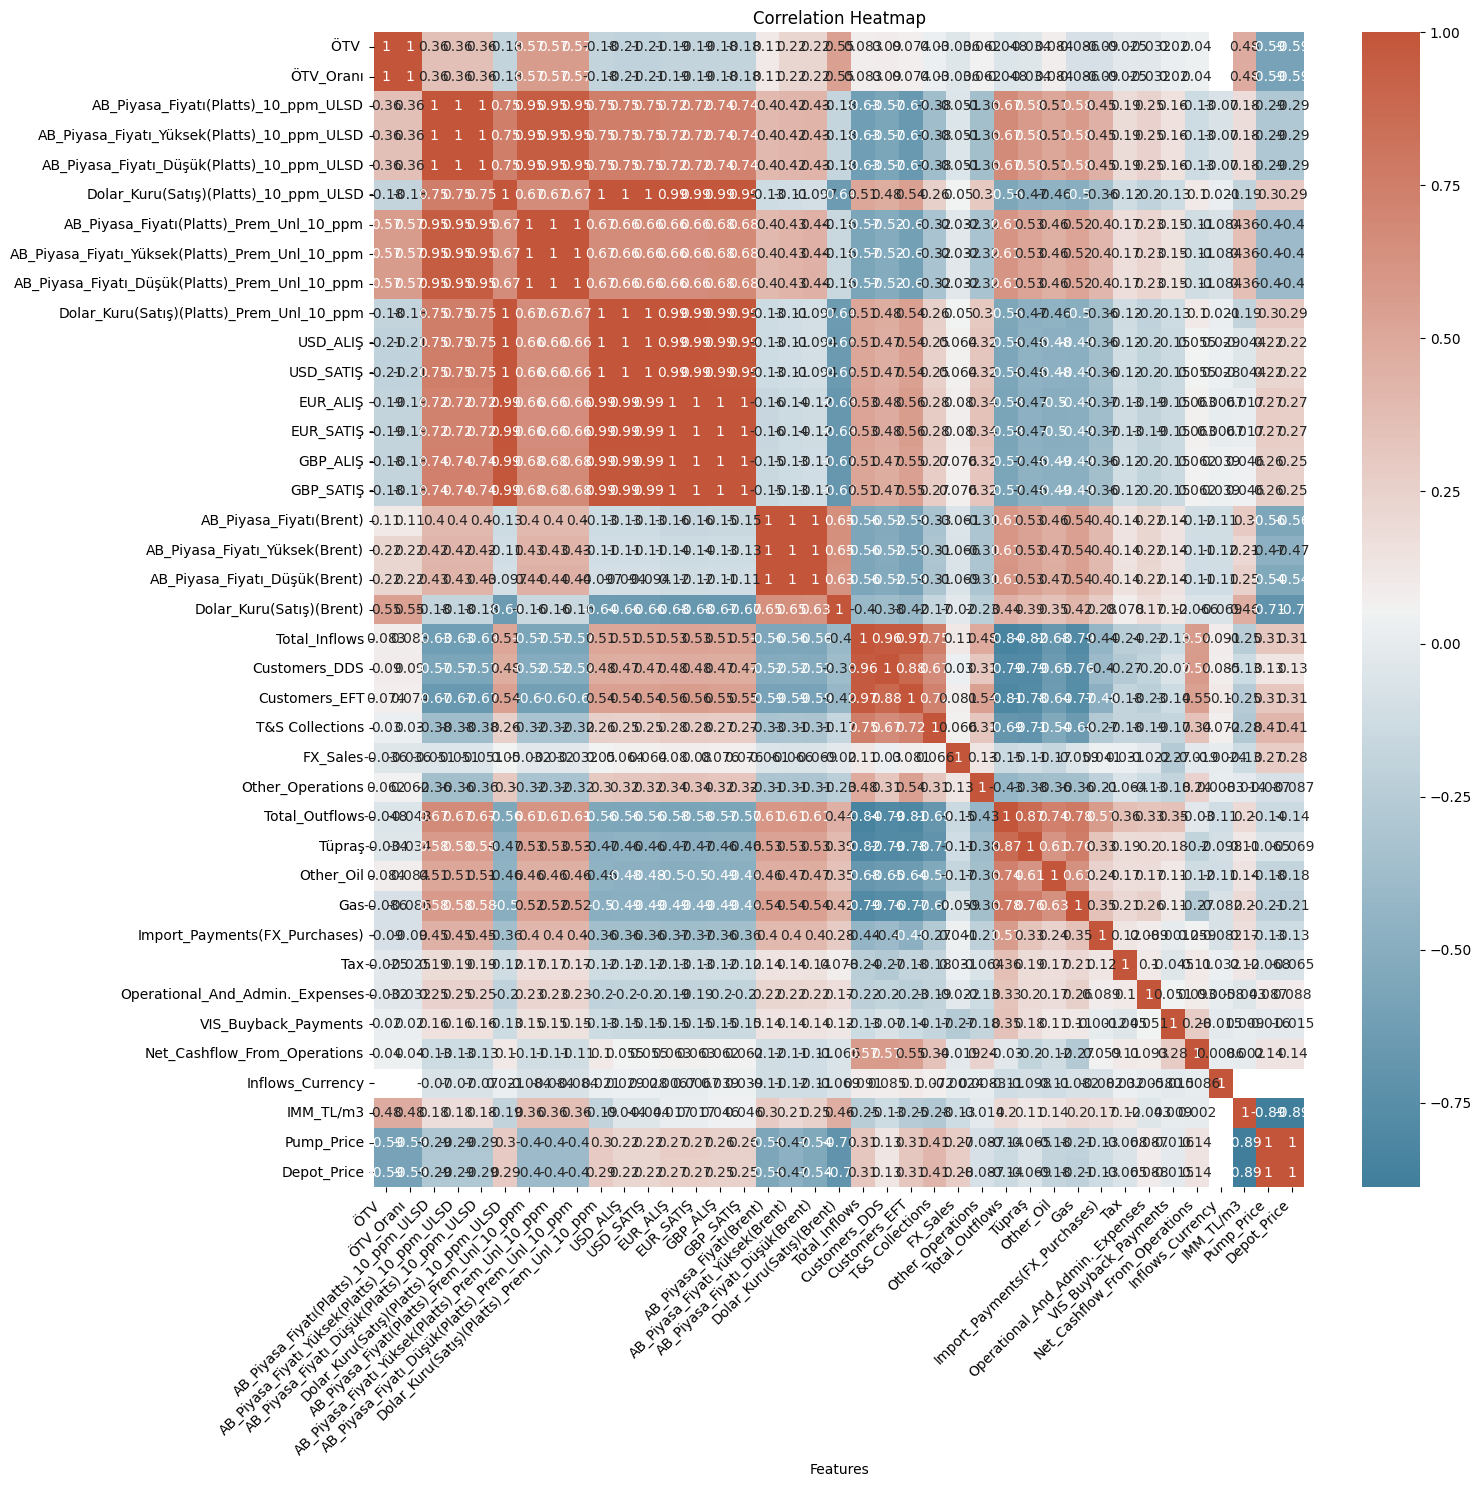

In [387]:
merged_data = merged_data.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == "object" else x)
correlation_matrix = merged_data.corr()
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap=sns.diverging_palette(230, 20, as_cmap=True))
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Heatmap')
plt.xlabel('Features')
plt.show()

In [ ]:
correlation_df = pd.DataFrame(correlation_matrix)
correlation_df 

In [ ]:
filtered_corr_matrix = correlation_matrix[(correlation_matrix > 0.5) | (correlation_matrix < -0.5)]
filtered_corr_matrix

In [390]:
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Yıl        1857 non-null   float64       
 1   Date       1857 non-null   datetime64[ns]
 2   USD_ALIŞ   1276 non-null   float64       
 3   USD_SATIŞ  1276 non-null   float64       
 4   EUR_ALIŞ   1276 non-null   float64       
 5   EUR_SATIŞ  1276 non-null   float64       
 6   GBP_ALIŞ   1276 non-null   float64       
 7   GBP_SATIŞ  1276 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 116.2 KB


In [391]:
merged_data_2 = pd.merge(platts[["Date","AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD","Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm","AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm","AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm","Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]],brent[["Date","AB_Piyasa_Fiyatı_Düşük(Brent)","Dolar_Kuru(Satış)(Brent)"]],on="Date",how="outer")
merged_data_2 = pd.merge(merged_data_2, cash_flow_train[["Date","Total_Inflows","Customers_EFT","Total_Outflows"]],on="Date",how="outer")
merged_data_2 = pd.merge(merged_data_2, usd[["Date",'USD_ALIŞ', 'USD_SATIŞ', 'EUR_ALIŞ', 'EUR_SATIŞ','GBP_ALIŞ', 'GBP_SATIŞ']],on="Date",how="outer")
merged_data_2 = merged_data_2.sort_values('Date')
merged_data_2 = merged_data_2.drop_duplicates()
merged_data_2 = merged_data_2.reset_index(drop=True)
merged_data_2 = merged_data_2.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == "object" else x)
merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1857 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1825 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1825 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1825 non-null   float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1825 non-null   float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_

In [392]:
merged_data_3 = merged_data_2.dropna()
merged_data_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978 entries, 365 to 1823
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             978 non-null    datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             978 non-null    float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      978 non-null    float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       978 non-null    float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            978 non-null    float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         978 non-null    float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  978 non-null    float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   978 non-null    float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm 

In [393]:
merged_data_4 = merged_data_2[merged_data_2["EUR_ALIŞ"].isnull()]
merged_data_4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 581 entries, 4 to 1853
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             581 non-null    datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             572 non-null    float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      572 non-null    float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       572 non-null    float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            572 non-null    float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         572 non-null    float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  572 non-null    float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   572 non-null    float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm   

In [394]:
X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["EUR_ALIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["EUR_ALIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["EUR_ALIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "EUR_ALIŞ"] = prediction

X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["EUR_SATIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["EUR_SATIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["EUR_SATIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "EUR_SATIŞ"] = prediction

X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["USD_ALIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["USD_ALIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["USD_ALIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "USD_ALIŞ"] = prediction

X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["USD_SATIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["USD_SATIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["USD_SATIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "USD_SATIŞ"] = prediction

X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["GBP_ALIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["GBP_ALIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["GBP_ALIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "GBP_ALIŞ"] = prediction

X = merged_data_3["Dolar_Kuru(Satış)(Brent)"]
y = merged_data_3["GBP_SATIŞ"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.values.reshape(-1, 1)
X_test = X_test.values.reshape(-1, 1)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_2[merged_data_2["GBP_SATIŞ"].isnull()]
prediction = model.predict(empty_lines["Dolar_Kuru(Satış)(Brent)"].values.reshape(-1, 1))
empty_lines_index = merged_data_2[merged_data_2["GBP_SATIŞ"].isnull()].index
merged_data_2.loc[empty_lines_index, "GBP_SATIŞ"] = prediction

merged_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 20 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1857 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1825 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1825 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1825 non-null   float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1825 non-null   float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_

In [395]:
usd.columns

Index(['Yıl', 'Date', 'USD_ALIŞ', 'USD_SATIŞ', 'EUR_ALIŞ', 'EUR_SATIŞ',
       'GBP_ALIŞ', 'GBP_SATIŞ'],
      dtype='object')

In [396]:
usd[['USD_ALIŞ', 'USD_SATIŞ', 'EUR_ALIŞ', 'EUR_SATIŞ','GBP_ALIŞ', 'GBP_SATIŞ']] = merged_data_2[['USD_ALIŞ', 'USD_SATIŞ', 'EUR_ALIŞ', 'EUR_SATIŞ','GBP_ALIŞ', 'GBP_SATIŞ']]
usd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Yıl        1857 non-null   float64       
 1   Date       1857 non-null   datetime64[ns]
 2   USD_ALIŞ   1857 non-null   float64       
 3   USD_SATIŞ  1857 non-null   float64       
 4   EUR_ALIŞ   1857 non-null   float64       
 5   EUR_SATIŞ  1857 non-null   float64       
 6   GBP_ALIŞ   1857 non-null   float64       
 7   GBP_SATIŞ  1857 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 116.2 KB


In [397]:
merged_data_5 = pd.merge(platts[["Date","AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD","Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD","AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm","AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm","AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm","Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]],brent[["Date","AB_Piyasa_Fiyatı_Yüksek(Brent)","AB_Piyasa_Fiyatı_Düşük(Brent)"]],on="Date",how="outer")
merged_data_5 = merged_data_5.sort_values('Date')
merged_data_5 = merged_data_5.drop_duplicates()
merged_data_5 = merged_data_5.reset_index(drop=True)
merged_data_5 = merged_data_5.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == "object" else x)
merged_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1857 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1825 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1825 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1825 non-null   float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1825 non-null   float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_

In [398]:
merged_data_6 = merged_data_5.dropna()
merged_data_6.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1781 entries, 0 to 1824
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1781 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1781 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1781 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1781 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1781 non-null   float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1781 non-null   float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1781 non-null   float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1781 non-null   float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm  

In [399]:
merged_data_7 = merged_data_5[merged_data_5["AB_Piyasa_Fiyatı_Yüksek(Brent)"].isnull()]
merged_data_7.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44 entries, 1519 to 1587
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             44 non-null     datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             44 non-null     float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      44 non-null     float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       44 non-null     float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            44 non-null     float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         44 non-null     float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  44 non-null     float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   44 non-null     float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm 

In [400]:
X = merged_data_6[["AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD",
                   "Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm",
                   "Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]]
y = merged_data_6["AB_Piyasa_Fiyatı_Yüksek(Brent)"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_5[merged_data_5["AB_Piyasa_Fiyatı_Yüksek(Brent)"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[["AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD",
                   "Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm",
                   "Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]]
    prediction = model.predict(X_empty)
    empty_lines_index = empty_lines.index
    merged_data_5.loc[empty_lines_index, "AB_Piyasa_Fiyatı_Yüksek(Brent)"] = prediction
    
X = merged_data_6[["AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD",
                   "Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm",
                   "Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]]
y = merged_data_6["AB_Piyasa_Fiyatı_Düşük(Brent)"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_5[merged_data_5["AB_Piyasa_Fiyatı_Düşük(Brent)"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[["AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD",
                   "Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD",
                   "AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm",
                   "AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm",
                   "Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_ppm"]]
    prediction = model.predict(X_empty)
    empty_lines_index = empty_lines.index
    merged_data_5.loc[empty_lines_index, "AB_Piyasa_Fiyatı_Düşük(Brent)"] = prediction
    
merged_data_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 11 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Date                                             1857 non-null   datetime64[ns]
 1   AB_Piyasa_Fiyatı(Platts)_10_ppm_ULSD             1825 non-null   float64       
 2   AB_Piyasa_Fiyatı_Yüksek(Platts)_10_ppm_ULSD      1825 non-null   float64       
 3   AB_Piyasa_Fiyatı_Düşük(Platts)_10_ppm_ULSD       1825 non-null   float64       
 4   Dolar_Kuru(Satış)(Platts)_10_ppm_ULSD            1825 non-null   float64       
 5   AB_Piyasa_Fiyatı(Platts)_Prem_Unl_10_ppm         1825 non-null   float64       
 6   AB_Piyasa_Fiyatı_Yüksek(Platts)_Prem_Unl_10_ppm  1825 non-null   float64       
 7   AB_Piyasa_Fiyatı_Düşük(Platts)_Prem_Unl_10_ppm   1825 non-null   float64       
 8   Dolar_Kuru(Satış)(Platts)_Prem_Unl_10_

In [401]:
brent["AB_Piyasa_Fiyatı_Yüksek(Brent)"] = merged_data_5["AB_Piyasa_Fiyatı_Yüksek(Brent)"]
brent["AB_Piyasa_Fiyatı_Düşük(Brent)"] = merged_data_5["AB_Piyasa_Fiyatı_Düşük(Brent)"]
brent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1857 entries, 1856 to 0
Data columns (total 7 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   Date                               1857 non-null   datetime64[ns]
 1   Ürün                               1857 non-null   object        
 2   Avrupa_Birliği_Para_Birimi(Brent)  1857 non-null   object        
 3   AB_Piyasa_Fiyatı(Brent)            1857 non-null   float64       
 4   AB_Piyasa_Fiyatı_Yüksek(Brent)     1857 non-null   float64       
 5   AB_Piyasa_Fiyatı_Düşük(Brent)      1857 non-null   float64       
 6   Dolar_Kuru(Satış)(Brent)           1857 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 180.6+ KB


In [402]:
merged_data_8 = pd.merge(cash_flow_train[["Date","Inflows_Currency"]],brent[["Date","AB_Piyasa_Fiyatı(Brent)","AB_Piyasa_Fiyatı_Yüksek(Brent)","AB_Piyasa_Fiyatı_Düşük(Brent)"]],on="Date",how="outer")
merged_data_8 = merged_data_8.sort_values('Date')
merged_data_8 = merged_data_8.drop_duplicates()
merged_data_8 = merged_data_8.reset_index(drop=True)
merged_data_8 = merged_data_8.apply(lambda x: x.str.replace(',', '').astype(float) if x.dtype == "object" else x)
merged_data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1857 non-null   datetime64[ns]
 1   Inflows_Currency                524 non-null    float64       
 2   AB_Piyasa_Fiyatı(Brent)         1857 non-null   float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Brent)  1857 non-null   float64       
 4   AB_Piyasa_Fiyatı_Düşük(Brent)   1857 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.7 KB


In [403]:
merged_data_9 = merged_data_8.dropna()
merged_data_9.info()

<class 'pandas.core.frame.DataFrame'>
Index: 524 entries, 1098 to 1856
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            524 non-null    datetime64[ns]
 1   Inflows_Currency                524 non-null    float64       
 2   AB_Piyasa_Fiyatı(Brent)         524 non-null    float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Brent)  524 non-null    float64       
 4   AB_Piyasa_Fiyatı_Düşük(Brent)   524 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 24.6 KB


In [404]:
merged_data_10 = merged_data_8[merged_data_8["Inflows_Currency"].isnull()]
merged_data_10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1853
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1333 non-null   datetime64[ns]
 1   Inflows_Currency                0 non-null      float64       
 2   AB_Piyasa_Fiyatı(Brent)         1333 non-null   float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Brent)  1333 non-null   float64       
 4   AB_Piyasa_Fiyatı_Düşük(Brent)   1333 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 62.5 KB


In [405]:
X = merged_data_9[["AB_Piyasa_Fiyatı(Brent)","AB_Piyasa_Fiyatı_Yüksek(Brent)","AB_Piyasa_Fiyatı_Düşük(Brent)"]]
y = merged_data_9["Inflows_Currency"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data_8[merged_data_8["Inflows_Currency"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[["AB_Piyasa_Fiyatı(Brent)","AB_Piyasa_Fiyatı_Yüksek(Brent)","AB_Piyasa_Fiyatı_Düşük(Brent)"]]
    prediction = model.predict(X_empty)
    empty_lines_index = empty_lines.index
    merged_data_8.loc[empty_lines_index, "Inflows_Currency"] = prediction
    
merged_data_8.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            1857 non-null   datetime64[ns]
 1   Inflows_Currency                1857 non-null   float64       
 2   AB_Piyasa_Fiyatı(Brent)         1857 non-null   float64       
 3   AB_Piyasa_Fiyatı_Yüksek(Brent)  1857 non-null   float64       
 4   AB_Piyasa_Fiyatı_Düşük(Brent)   1857 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 72.7 KB


In [406]:
cash_flow_train["Inflows_Currency"] = merged_data_8["Inflows_Currency"]
cash_flow_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1492 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1492 non-null   datetime64[ns]
 1   Total_Inflows                    1025 non-null   float64       
 2   Customers_DDS                    1025 non-null   float64       
 3   Customers_EFT                    1025 non-null   float64       
 4   T&S Collections                  1025 non-null   float64       
 5   FX_Sales                         1025 non-null   float64       
 6   Other_Operations                 1025 non-null   float64       
 7   Total_Outflows                   1025 non-null   float64       
 8   Tüpraş                           1025 non-null   float64       
 9   Other_Oil                        1025 non-null   float64       
 10  Gas                              1025 non-null   float64       
 

In [ ]:
cash_flow_train["Date"]

In [408]:
cash_flow_train = cash_flow_train.dropna()
cash_flow_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1025 non-null   datetime64[ns]
 1   Total_Inflows                    1025 non-null   float64       
 2   Customers_DDS                    1025 non-null   float64       
 3   Customers_EFT                    1025 non-null   float64       
 4   T&S Collections                  1025 non-null   float64       
 5   FX_Sales                         1025 non-null   float64       
 6   Other_Operations                 1025 non-null   float64       
 7   Total_Outflows                   1025 non-null   float64       
 8   Tüpraş                           1025 non-null   float64       
 9   Other_Oil                        1025 non-null   float64       
 10  Gas                              1025 non-null   float64       
 

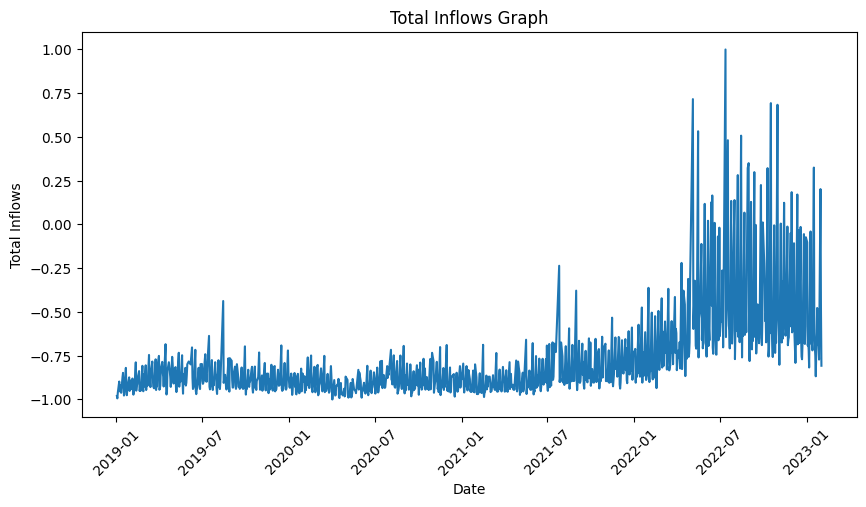

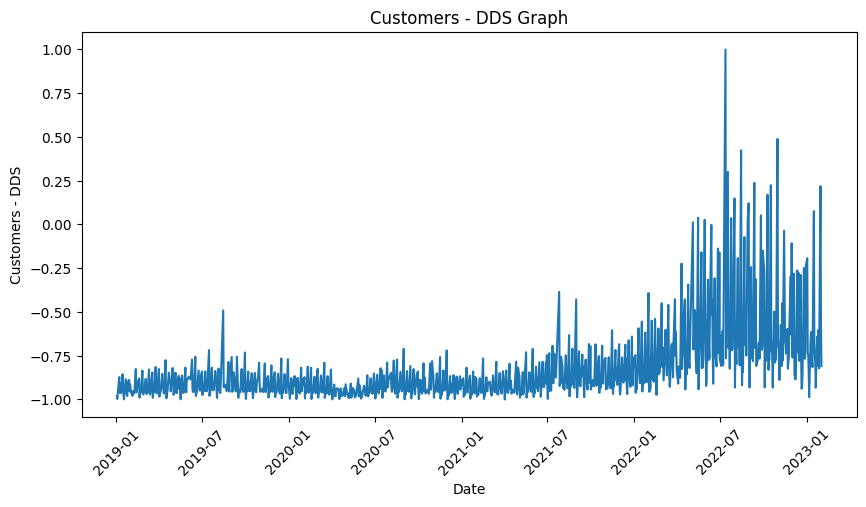

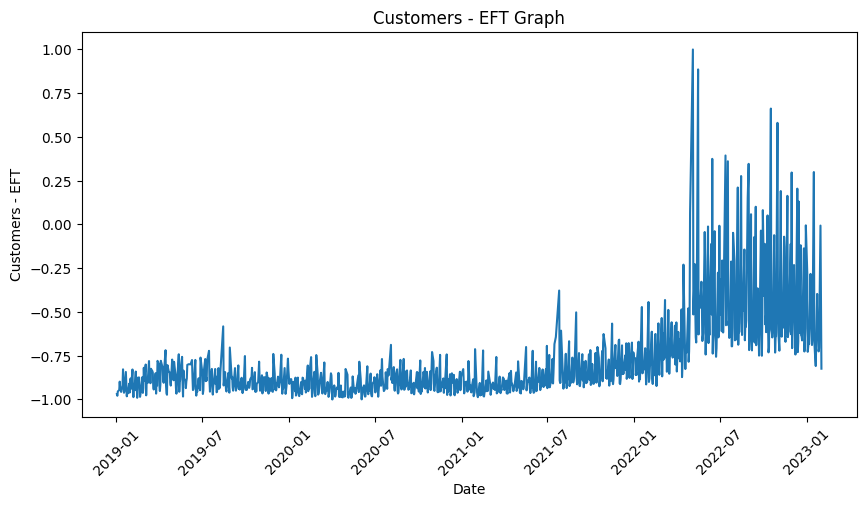

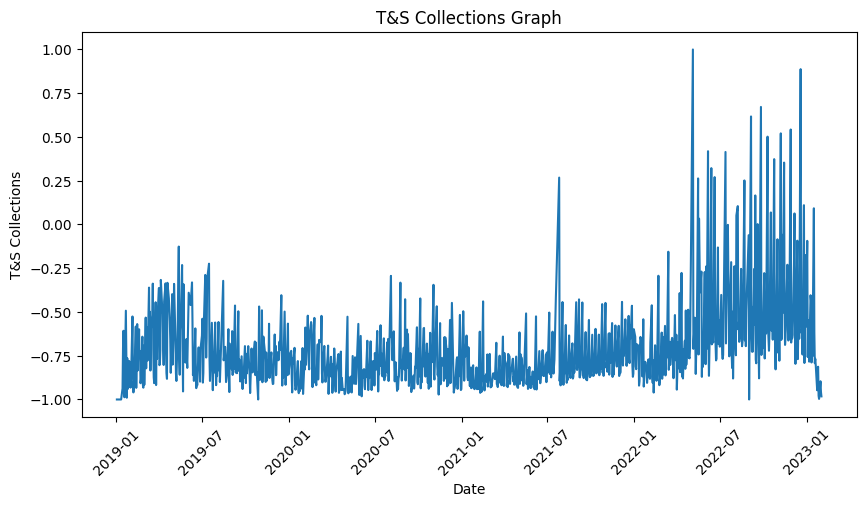

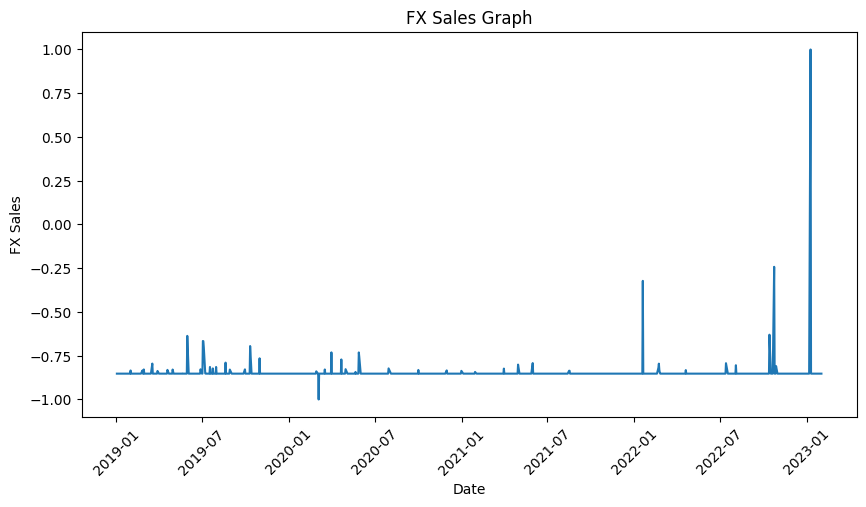

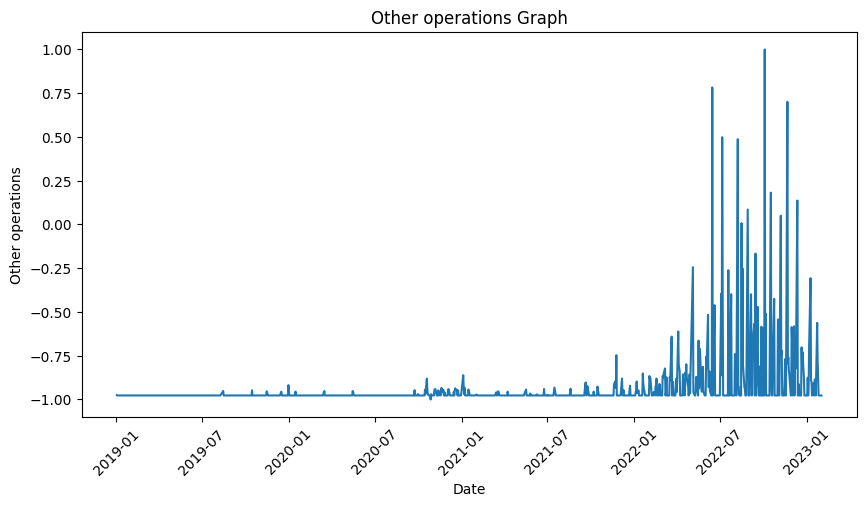

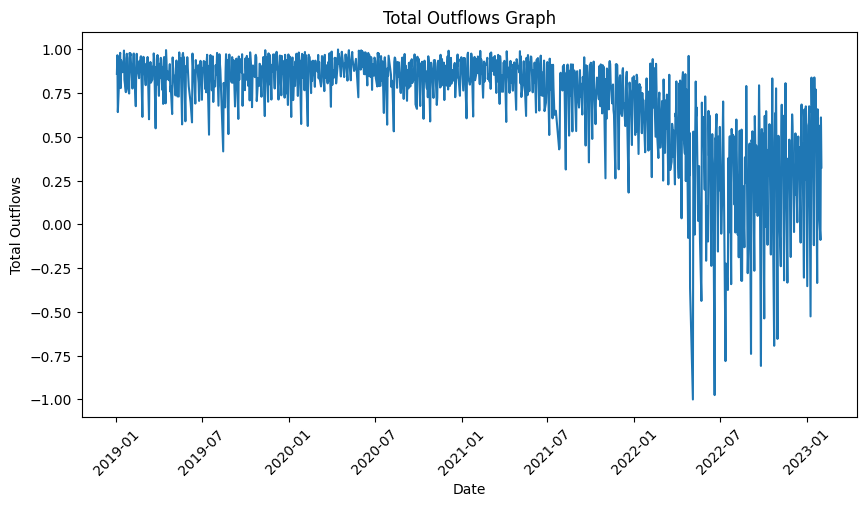

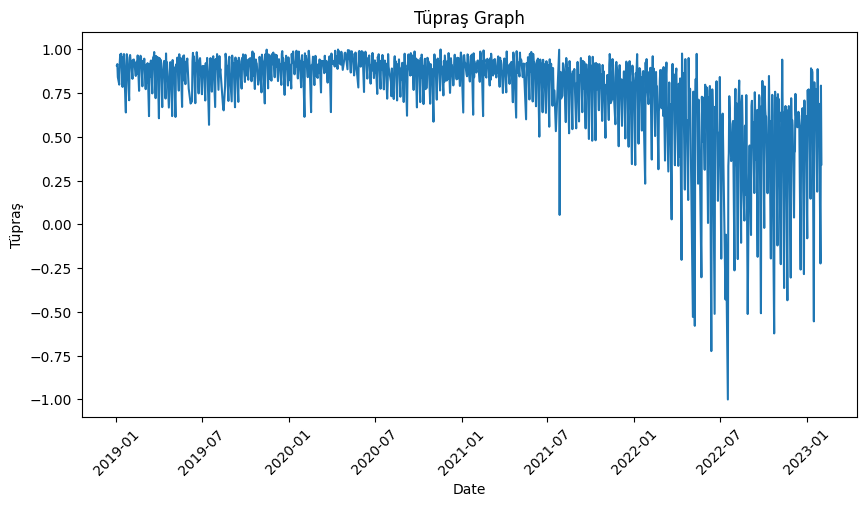

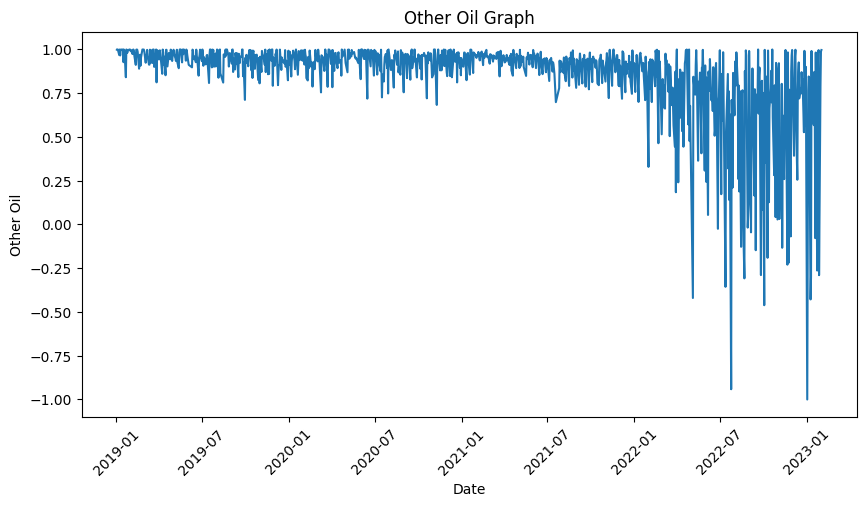

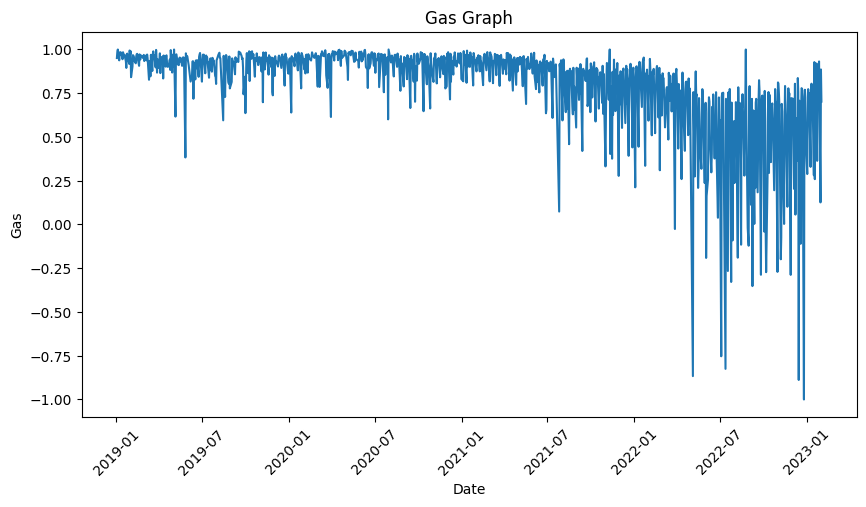

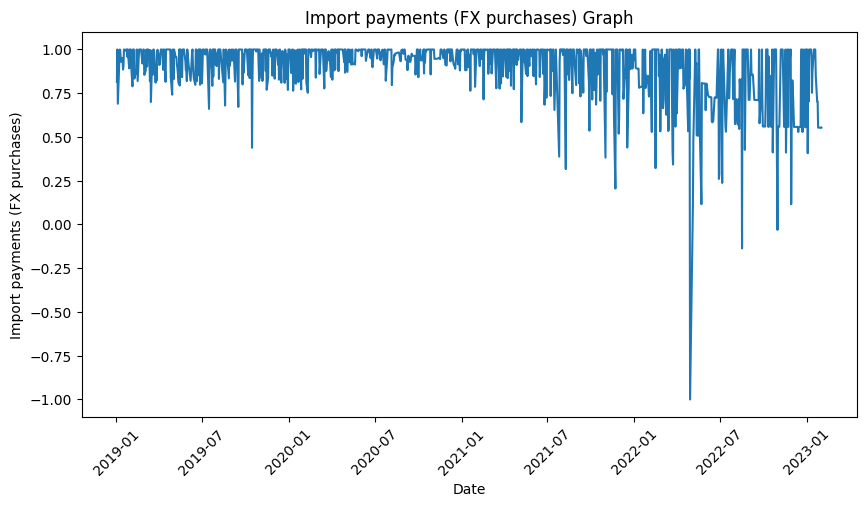

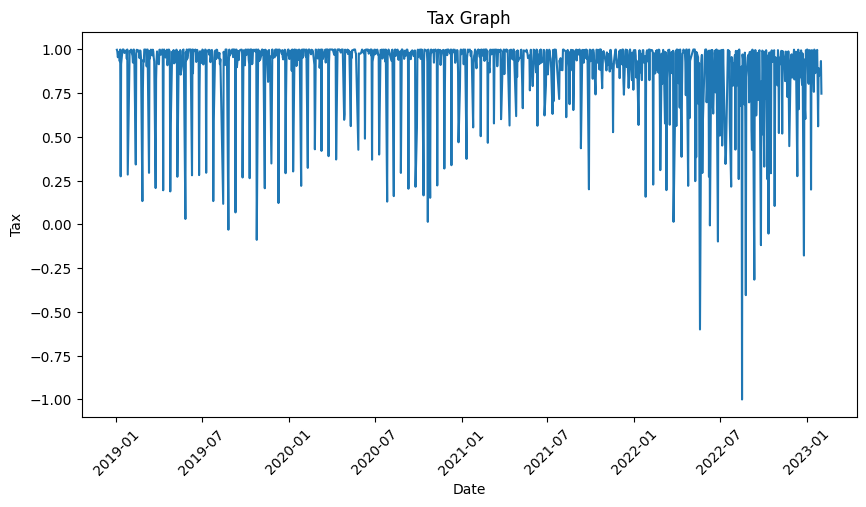

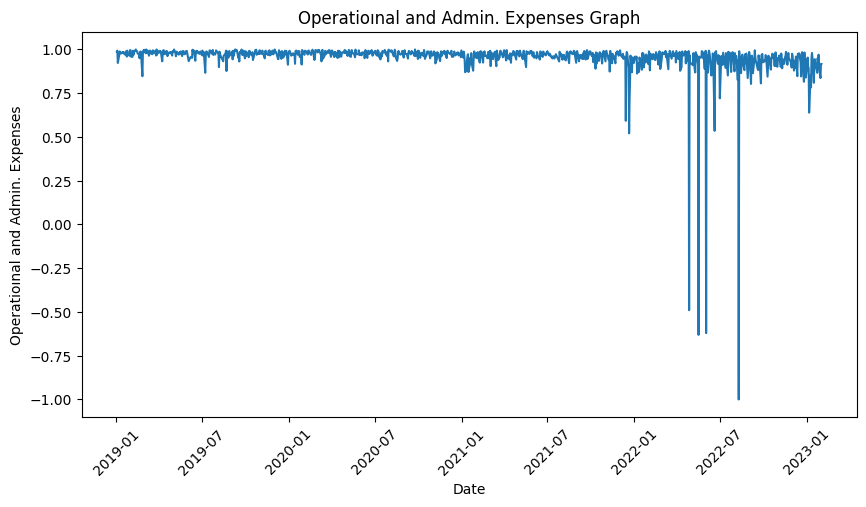

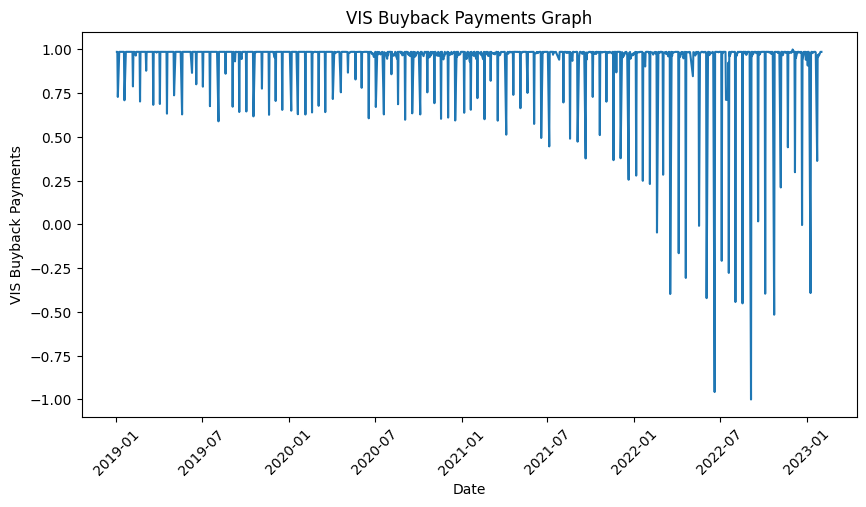

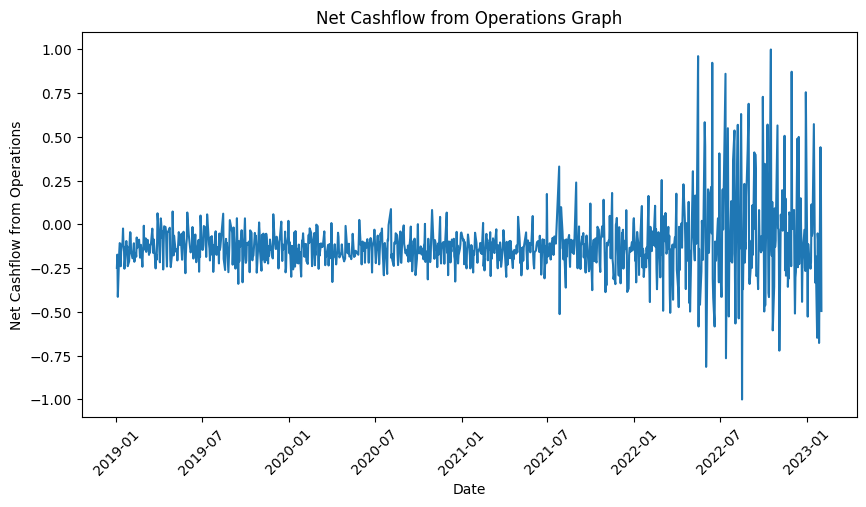

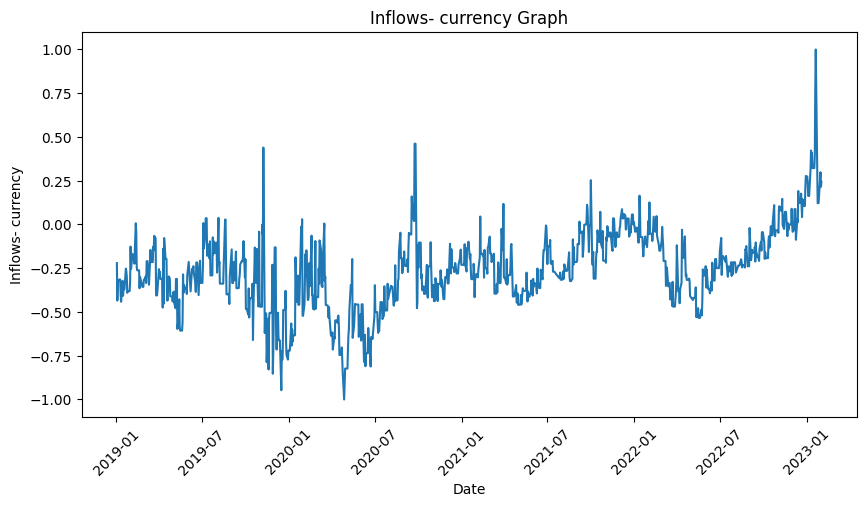

In [409]:
scaler = MinMaxScaler(feature_range=(-1,1))
new_column1 = scaler.fit_transform(cash_flow_train["Total_Inflows"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column1
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Total Inflows')
plt.title('Total Inflows Graph')
plt.xticks(rotation=45)
plt.show()
new_column2 = scaler.fit_transform(cash_flow_train["Customers_DDS"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column2
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Customers - DDS')
plt.title('Customers - DDS Graph')
plt.xticks(rotation=45)
plt.show()
new_column3 = scaler.fit_transform(cash_flow_train["Customers_EFT"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column3
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Customers - EFT')
plt.title('Customers - EFT Graph')
plt.xticks(rotation=45)
plt.show()
new_column4 = scaler.fit_transform(cash_flow_train["T&S Collections"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column4
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('T&S Collections')
plt.title('T&S Collections Graph')
plt.xticks(rotation=45)
plt.show()
new_column5 = scaler.fit_transform(cash_flow_train["FX_Sales"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column5
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('FX Sales')
plt.title('FX Sales Graph')
plt.xticks(rotation=45)
plt.show()
new_column6 = scaler.fit_transform(cash_flow_train["Other_Operations"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column6
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Other operations')
plt.title('Other operations Graph')
plt.xticks(rotation=45)
plt.show()
new_column7 = scaler.fit_transform(cash_flow_train["Total_Outflows"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column7
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Total Outflows')
plt.title('Total Outflows Graph')
plt.xticks(rotation=45)
plt.show()
new_column8 = scaler.fit_transform(cash_flow_train["Tüpraş"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column8
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Tüpraş')
plt.title('Tüpraş Graph')
plt.xticks(rotation=45)
plt.show()
new_column9 = scaler.fit_transform(cash_flow_train["Other_Oil"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column9
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Other Oil')
plt.title('Other Oil Graph')
plt.xticks(rotation=45)
plt.show()
new_column10 = scaler.fit_transform(cash_flow_train["Gas"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column10
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Gas')
plt.title('Gas Graph')
plt.xticks(rotation=45)
plt.show()
new_column11 = scaler.fit_transform(cash_flow_train["Import_Payments(FX_Purchases)"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column11
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Import payments (FX purchases)')
plt.title('Import payments (FX purchases) Graph')
plt.xticks(rotation=45)
plt.show()
new_column12 = scaler.fit_transform(cash_flow_train["Tax"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column12
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Tax')
plt.title('Tax Graph')
plt.xticks(rotation=45)
plt.show()
new_column13 = scaler.fit_transform(cash_flow_train["Operational_And_Admin._Expenses"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column13
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Operatioınal and Admin. Expenses')
plt.title('Operatioınal and Admin. Expenses Graph')
plt.xticks(rotation=45)
plt.show()
new_column14 = scaler.fit_transform(cash_flow_train["VIS_Buyback_Payments"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column14
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('VIS Buyback Payments')
plt.title('VIS Buyback Payments Graph')
plt.xticks(rotation=45)
plt.show()
new_column15 = scaler.fit_transform(cash_flow_train["Net_Cashflow_From_Operations"].values.reshape(-1,1))
cash_flow_train['Date'] = pd.to_datetime(cash_flow_train['Date'])
x = cash_flow_train["Date"]
y = new_column15
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Net Cashflow from Operations')
plt.title('Net Cashflow from Operations Graph')
plt.xticks(rotation=45)
plt.show()
new_column16 = scaler.fit_transform(cash_flow_train["Inflows_Currency"].values.reshape(-1,1))
x = cash_flow_train["Date"]
y = new_column16
plt.figure(figsize=(10,5))
plt.plot(x, y)
plt.xlabel('Date')
plt.ylabel('Inflows- currency')
plt.title('Inflows- currency Graph')
plt.xticks(rotation=45)
plt.show()

In [410]:
cash_flow_train.columns

Index(['Date', 'Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Net_Cashflow_From_Operations', 'Inflows_Currency'],
      dtype='object')

In [411]:
model = ARIMA(cash_flow_train["Total_Inflows"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_1 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Total_Inflows': forecast_1})

model = ARIMA(cash_flow_train["Customers_DDS"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_2 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, "Customers_DDS": forecast_2})

model = ARIMA(cash_flow_train['Customers_EFT'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_3 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Customers_EFT': forecast_3})

model = ARIMA(cash_flow_train['T&S Collections'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_4 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'T&S Collections': forecast_4})

model = ARIMA(cash_flow_train['FX_Sales'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_5 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'FX_Sales': forecast_5})

model = ARIMA(cash_flow_train['Other_Operations'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_6 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Other_Operations': forecast_6})

model = ARIMA(cash_flow_train['Total_Outflows'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_7 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Total_Outflows': forecast_7})

model = ARIMA(cash_flow_train['Tüpraş'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_8 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Tüpraş': forecast_8})

model = ARIMA(cash_flow_train["Other_Oil"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_9 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, "Other_Oil": forecast_9})

model = ARIMA(cash_flow_train['Gas'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_10 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Gas': forecast_10})

model = ARIMA(cash_flow_train["Import_Payments(FX_Purchases)"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_11 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, "Import_Payments(FX_Purchases)": forecast_11})

model = ARIMA(cash_flow_train["Tax"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_12 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, "Tax": forecast_12})

model = ARIMA(cash_flow_train["Operational_And_Admin._Expenses"], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_13 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, "Operational_And_Admin._Expenses": forecast_13})

model = ARIMA(cash_flow_train['VIS_Buyback_Payments'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_14 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'VIS_Buyback_Payments': forecast_14})

model = ARIMA(cash_flow_train['Inflows_Currency'], order=(1, 1, 1))
model_fit = model.fit()
future_dates = pd.date_range(start='2023-02-02', end='2023-05-12') 
forecast_15 = model_fit.predict(start=len(cash_flow_train), end=len(cash_flow_train) + len(future_dates) - 1)
forecast_dates = pd.DataFrame({'Date': future_dates, 'Inflows_Currency': forecast_15})

forecast_dates['Total_Inflows'] = forecast_1
forecast_dates['Customers_DDS'] = forecast_2
forecast_dates['Customers_EFT'] = forecast_3
forecast_dates['T&S Collections'] = forecast_4
forecast_dates['FX_Sales'] = forecast_5
forecast_dates['Other_Operations'] = forecast_6
forecast_dates['Total_Outflows'] = forecast_7
forecast_dates['Tüpraş'] = forecast_8
forecast_dates['Other_Oil'] = forecast_9
forecast_dates['Gas'] = forecast_10
forecast_dates['Import_Payments(FX_Purchases)'] = forecast_11
forecast_dates['Tax'] = forecast_12
forecast_dates['Operational_And_Admin._Expenses'] = forecast_13
forecast_dates['VIS_Buyback_Payments'] = forecast_14
forecast_dates['Inflows_Currency'] = forecast_15

forecast_dates.head()

,Date,Inflows_Currency,Total_Inflows,Customers_DDS,Customers_EFT,T&S Collections,FX_Sales,Other_Operations,Total_Outflows,Tüpraş,Other_Oil,Gas,Import_Payments(FX_Purchases),Tax,Operational_And_Admin._Expenses,VIS_Buyback_Payments
1025,2023-02-02,219290.974865,2.300734e+08,1.152604e+08,8.468234e+07,1.291307e+07,1.291690e+06,6.908793e+06,-1.912566e+08,-6.894411e+07,-4.762557e+07,-8.954231e+06,-4.346847e+07,-1.172992e+07,-7.998464e+06,-1.101911e+07
1026,2023-02-03,221948.765524,2.107674e+08,1.073756e+08,8.211365e+07,1.192515e+07,1.298122e+06,6.549110e+06,-1.927760e+08,-7.368720e+07,-4.303180e+07,-8.652969e+06,-4.065481e+07,-1.209665e+07,-7.987990e+06,-1.003164e+07
1027,2023-02-04,223099.209275,2.134508e+08,1.084414e+08,8.224267e+07,1.200509e+07,1.298154e+06,6.567836e+06,-1.925621e+08,-7.296129e+07,-4.347785e+07,-8.694285e+06,-4.036326e+07,-1.206978e+07,-7.988341e+06,-1.012013e+07
1028,2023-02-05,223597.187105,2.130779e+08,1.082973e+08,8.223619e+07,1.199862e+07,1.298155e+06,6.566861e+06,-1.925923e+08,-7.307239e+07,-4.343454e+07,-8.688619e+06,-4.033305e+07,-1.207175e+07,-7.988329e+06,-1.011220e+07
1029,2023-02-06,223812.740380,2.131297e+08,1.083168e+08,8.223651e+07,1.199914e+07,1.298155e+06,6.566912e+06,-1.925880e+08,-7.305539e+07,-4.343874e+07,-8.689396e+06,-4.032992e+07,-1.207160e+07,-7.988329e+06,-1.011291e+07


In [412]:
forecast_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1025 to 1124
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             100 non-null    datetime64[ns]
 1   Inflows_Currency                 100 non-null    float64       
 2   Total_Inflows                    100 non-null    float64       
 3   Customers_DDS                    100 non-null    float64       
 4   Customers_EFT                    100 non-null    float64       
 5   T&S Collections                  100 non-null    float64       
 6   FX_Sales                         100 non-null    float64       
 7   Other_Operations                 100 non-null    float64       
 8   Total_Outflows                   100 non-null    float64       
 9   Tüpraş                           100 non-null    float64       
 10  Other_Oil                        100 non-null    float64       

In [413]:
forecast_dates['Net_Cashflow_From_Operations'] = np.nan
forecast_dates.head()

,Date,Inflows_Currency,Total_Inflows,Customers_DDS,Customers_EFT,T&S Collections,FX_Sales,Other_Operations,Total_Outflows,Tüpraş,Other_Oil,Gas,Import_Payments(FX_Purchases),Tax,Operational_And_Admin._Expenses,VIS_Buyback_Payments,Net_Cashflow_From_Operations
1025,2023-02-02,219290.974865,2.300734e+08,1.152604e+08,8.468234e+07,1.291307e+07,1.291690e+06,6.908793e+06,-1.912566e+08,-6.894411e+07,-4.762557e+07,-8.954231e+06,-4.346847e+07,-1.172992e+07,-7.998464e+06,-1.101911e+07,NaN
1026,2023-02-03,221948.765524,2.107674e+08,1.073756e+08,8.211365e+07,1.192515e+07,1.298122e+06,6.549110e+06,-1.927760e+08,-7.368720e+07,-4.303180e+07,-8.652969e+06,-4.065481e+07,-1.209665e+07,-7.987990e+06,-1.003164e+07,NaN
1027,2023-02-04,223099.209275,2.134508e+08,1.084414e+08,8.224267e+07,1.200509e+07,1.298154e+06,6.567836e+06,-1.925621e+08,-7.296129e+07,-4.347785e+07,-8.694285e+06,-4.036326e+07,-1.206978e+07,-7.988341e+06,-1.012013e+07,NaN
1028,2023-02-05,223597.187105,2.130779e+08,1.082973e+08,8.223619e+07,1.199862e+07,1.298155e+06,6.566861e+06,-1.925923e+08,-7.307239e+07,-4.343454e+07,-8.688619e+06,-4.033305e+07,-1.207175e+07,-7.988329e+06,-1.011220e+07,NaN
1029,2023-02-06,223812.740380,2.131297e+08,1.083168e+08,8.223651e+07,1.199914e+07,1.298155e+06,6.566912e+06,-1.925880e+08,-7.305539e+07,-4.343874e+07,-8.689396e+06,-4.032992e+07,-1.207160e+07,-7.988329e+06,-1.011291e+07,NaN


In [414]:
forecast_dates.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 1025 to 1124
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             100 non-null    datetime64[ns]
 1   Inflows_Currency                 100 non-null    float64       
 2   Total_Inflows                    100 non-null    float64       
 3   Customers_DDS                    100 non-null    float64       
 4   Customers_EFT                    100 non-null    float64       
 5   T&S Collections                  100 non-null    float64       
 6   FX_Sales                         100 non-null    float64       
 7   Other_Operations                 100 non-null    float64       
 8   Total_Outflows                   100 non-null    float64       
 9   Tüpraş                           100 non-null    float64       
 10  Other_Oil                        100 non-null    float64       

In [415]:
cash_flow_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1025 entries, 0 to 1024
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Date                             1025 non-null   datetime64[ns]
 1   Total_Inflows                    1025 non-null   float64       
 2   Customers_DDS                    1025 non-null   float64       
 3   Customers_EFT                    1025 non-null   float64       
 4   T&S Collections                  1025 non-null   float64       
 5   FX_Sales                         1025 non-null   float64       
 6   Other_Operations                 1025 non-null   float64       
 7   Total_Outflows                   1025 non-null   float64       
 8   Tüpraş                           1025 non-null   float64       
 9   Other_Oil                        1025 non-null   float64       
 10  Gas                              1025 non-null   float64       
 

In [416]:
merged_data = pd.concat([cash_flow_train.set_index('Date'), forecast_dates.set_index('Date')], axis=0)
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1125 entries, 2019-01-02 to 2023-05-12
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Total_Inflows                    1125 non-null   float64
 1   Customers_DDS                    1125 non-null   float64
 2   Customers_EFT                    1125 non-null   float64
 3   T&S Collections                  1125 non-null   float64
 4   FX_Sales                         1125 non-null   float64
 5   Other_Operations                 1125 non-null   float64
 6   Total_Outflows                   1125 non-null   float64
 7   Tüpraş                           1125 non-null   float64
 8   Other_Oil                        1125 non-null   float64
 9   Gas                              1125 non-null   float64
 10  Import_Payments(FX_Purchases)    1125 non-null   float64
 11  Tax                              1125 non-null   float64
 12  Op

In [417]:
merged_data_11 = merged_data.dropna()
merged_data_11.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1025 entries, 2019-01-02 to 2023-02-01
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Total_Inflows                    1025 non-null   float64
 1   Customers_DDS                    1025 non-null   float64
 2   Customers_EFT                    1025 non-null   float64
 3   T&S Collections                  1025 non-null   float64
 4   FX_Sales                         1025 non-null   float64
 5   Other_Operations                 1025 non-null   float64
 6   Total_Outflows                   1025 non-null   float64
 7   Tüpraş                           1025 non-null   float64
 8   Other_Oil                        1025 non-null   float64
 9   Gas                              1025 non-null   float64
 10  Import_Payments(FX_Purchases)    1025 non-null   float64
 11  Tax                              1025 non-null   float64
 12  Op

In [418]:
cash_flow_train.columns

Index(['Date', 'Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Net_Cashflow_From_Operations', 'Inflows_Currency'],
      dtype='object')

In [419]:
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_LinearRegression = model.predict(X_empty)

X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_DecisionTreeRegressor = model.predict(X_empty)
    
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_RandomForestRegressor = model.predict(X_empty)
    
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVR()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_SVR = model.predict(X_empty)
    
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = GradientBoostingRegressor()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_GradientBoostingRegressor = model.predict(X_empty)
    
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = KNeighborsRegressor()
model.fit(X_train, y_train)
empty_lines = merged_data[merged_data["Net_Cashflow_From_Operations"].isnull()]
if not empty_lines.empty:
    X_empty = empty_lines[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
    prediction_KNeighborsRegressor = model.predict(X_empty)

In [420]:
X = merged_data_11[['Total_Inflows', 'Customers_DDS', 'Customers_EFT',
       'T&S Collections', 'FX_Sales', 'Other_Operations', 'Total_Outflows',
       'Tüpraş', 'Other_Oil', 'Gas', 'Import_Payments(FX_Purchases)', 'Tax',
       'Operational_And_Admin._Expenses', 'VIS_Buyback_Payments',
       'Inflows_Currency']]
y = merged_data_11["Net_Cashflow_From_Operations"].dropna()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor(), SVR(), GradientBoostingRegressor(), KNeighborsRegressor()]
predicts = []

for model in models:
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    predicts.append(prediction)

In [421]:
metrics = ["mean_absolute_error", "mean_squared_error", "root_mean_squared_error", "r2_score"]
algorithm_names = ["LinearRegression", "DecisionTreeRegressor", "RandomForestRegressor", "SVR", "GradientBoostingRegressor", "KNeighborsRegressor"]
series = []

def performance_calculate(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    data = [mae, mse, rmse, r2]
    return data

for i, predict in enumerate(predicts):
    data = performance_calculate(y_test, predict)
    series.append(data)

df = pd.DataFrame(data=series, index=algorithm_names, columns=metrics)
df.head()

,mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score
LinearRegression,4.286035e-07,4.741155e-13,6.885604e-07,1.000000
DecisionTreeRegressor,1.233006e+07,8.661541e+14,2.943050e+07,0.839176
RandomForestRegressor,1.034440e+07,6.717967e+14,2.591904e+07,0.875264
SVR,3.878991e+07,5.436136e+15,7.373016e+07,-0.009360
GradientBoostingRegressor,1.024139e+07,5.060532e+14,2.249563e+07,0.906038
